#import 

In [11]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt 

# Load Dataset


In [ ]:


file_path = "C:\\Users\\user\\Desktop\\Project\\NovaFinancialSolutions\\data\\raw_analyst_ratings.csv"
def load_data(file_path):
    if not os.path.exists(file_path):
        print(f"File not found: {file_path}")
        return None
    try:
        df = pd.read_csv(file_path)
        print(f" Dataset loaded successfully! Rows: {len(df)}, Columns: {len(df.columns)}")
        print(f"Columns: {list(df.columns)}")
        return df
    except pd.errors.EmptyDataError:
        print(f"The file is empty: {file_path}")
        return None
    except pd.errors.ParserError as e:
        print(f"Parsing error: {e}")
        return None
    except Exception as e:
        print(f"Unexpected error: {e}")
        return None
df = load_data(file_path)


 Dataset loaded successfully! Rows: 1407328, Columns: 6
Columns: ['Unnamed: 0', 'headline', 'url', 'publisher', 'date', 'stock']


# Headline Length Statistics


In [ ]:
def headline_length_stats(df):

    if 'headline' not in df.columns:
        print(" Error: 'headline' column not found in DataFrame!")
        return df
    df['headline_length_chars'] = df['headline'].astype(str).apply(len)
    df['headline_length_words'] = df['headline'].astype(str).apply(lambda x: len(x.split()))
    print("===== Headline Length Statistics =====")
    print("Characters:")
    print(df['headline_length_chars'].describe())
    print("\nWords:")
    print(df['headline_length_words'].describe())
    return df
df = headline_length_stats(df)

===== Headline Length Statistics =====
Characters:
count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length_chars, dtype: float64

Words:
count    1.407328e+06
mean     1.141671e+01
std      6.352997e+00
min      1.000000e+00
25%      7.000000e+00
50%      1.000000e+01
75%      1.300000e+01
max      7.700000e+01
Name: headline_length_words, dtype: float64


# Count Articles Per Publisher


===== Articles Per Publisher =====
publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
                      ...  
MoneyGeek                 1
muathe                    1
Robert Morris             1
LeftCoastHedgie           1
Jeremie Capron            1
Name: count, Length: 1034, dtype: int64


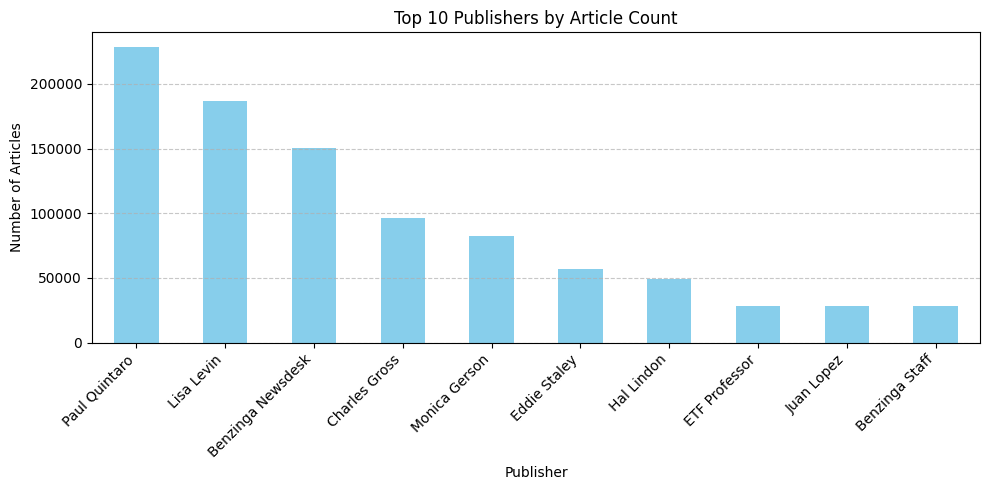

In [ ]:


def count_articles_per_publisher(df):

    if 'publisher' not in df.columns:
        print("Error: 'publisher' column missing in DataFrame!")
        return None
    publisher_counts = df['publisher'].value_counts()
    print("===== Articles Per Publisher =====")
    print(publisher_counts)
    plt.figure(figsize=(10, 5))
    publisher_counts.head(10).plot(kind='bar', color='skyblue')
    plt.title("Top 10 Publishers by Article Count")
    plt.xlabel("Publisher")
    plt.ylabel("Number of Articles")
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    return publisher_counts
publisher_counts = count_articles_per_publisher(df)